<p style="text-align: center; font-size: 20px;">𝐏𝐫𝐨𝐣𝐞𝐜𝐭: 𝐓𝐞𝐦𝐩𝐞𝐫𝐚𝐭𝐮𝐫𝐞 𝐩𝐫𝐞𝐝𝐢𝐜𝐭𝐢𝐨𝐧 𝐟𝐨𝐫 𝐚𝐠𝐫𝐢𝐜𝐮𝐥𝐭𝐮𝐫𝐞</p>


## Table of Contents
* 1.Understanding data
* 2.Loading and Data Processing
* 3.Exploratory Data Analysis(EDA)
* 4.Feature Engineering & Data Wrangling
* 5.Model Training

#### Understanding data
* tempmax, tempmin, temp: highest lowest temperature and average temperature.
* feelslikemax, feelslikemin, feelslike: actual temperature versus felt temperature.
* humidity: Humidity during the day.
* dew: dewpoint
* precip (precipitation): This is the actual amount of rainwater that falls or reaches the ground during the day.
* precipprob (precipitation probability): This is the probability of rain during the day.
* precipcover (precipitation coverage): This is the percentage of area of a specific area covered by rain.
* preciptype: type of rain
* snow, snowdepth: snow and snow depth
* solar radiation, solar energy: solar radiation and solar energy during the day
* windspeed, winddir: Wind speed and direction can also impact rainy conditions.
* visibility: Visibility.
* uv index: UV rays
* severerisk: Severe weather conditions such as storms, flash floods
* sunrise: sunrise
* description, icon, stations: weather status of the day such as: rainy, windy, cloudy sky


### Loading and Data Processing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving dataaaset_weather.xlsx to dataaaset_weather.xlsx


In [ ]:
dataa = pd.read_excel('dataaaset_weather.xlsx')

In [ ]:
dataa.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Xã Thạch Hòa, Huyện Thạch Thất, Việt Nam",2010-01-01,18.5,16.0,16.6,18.5,16.0,16.6,16.0,96.6,...,9.7,4,NaN,2010-01-01T06:35:03,2010-01-01T17:27:49,0.50,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"48820099999,48831099999,VVNB"
1,"Xã Thạch Hòa, Huyện Thạch Thất, Việt Nam",2010-01-02,18.0,15.8,16.8,18.0,15.8,16.8,15.5,92.2,...,10.2,5,NaN,2010-01-02T06:35:22,2010-01-02T17:28:26,0.55,"Rain, Overcast",Cloudy skies throughout the day with rain in t...,rain,"48820099999,VVNB"
2,"Xã Thạch Hòa, Huyện Thạch Thất, Việt Nam",2010-01-03,22.0,17.0,19.4,22.0,17.0,19.4,15.7,79.6,...,11.7,5,NaN,2010-01-03T06:35:40,2010-01-03T17:29:04,0.58,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"48820099999,VVNB"
3,"Xã Thạch Hòa, Huyện Thạch Thất, Việt Nam",2010-01-04,22.0,18.0,19.7,22.0,18.0,19.7,17.6,87.8,...,17.0,7,NaN,2010-01-04T06:35:57,2010-01-04T17:29:43,0.62,Overcast,Cloudy skies throughout the day.,cloudy,"48820099999,VVNB"
4,"Xã Thạch Hòa, Huyện Thạch Thất, Việt Nam",2010-01-05,27.0,19.9,22.4,28.2,19.9,22.4,19.8,86.1,...,18.0,8,NaN,2010-01-05T06:36:12,2010-01-05T17:30:22,0.65,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"48820099999,VVNB"


In [ ]:
dataa.columns


Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windspeed',
       'winddir', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk', 'sunrise', 'sunset', 'moonphase', 'conditions',
       'description', 'icon', 'stations'],
      dtype='object')

In [ ]:
dataa.drop(['name', 'snow','temp','preciptype','feelslikemax', 'feelslikemin', 'feelslike','precipprob', 'snowdepth', 'visibility', 'uvindex', 'severerisk',
            'sunrise', 'sunset', 'moonphase', 'conditions', 'description', 'stations', 'icon'], inplace=True, axis=1)


In [ ]:
dataa.head(10)

,datetime,tempmax,tempmin,dew,humidity,precip,precipcover,windspeed,winddir,solarradiation,solarenergy
0,2010-01-01,18.5,16.0,16.0,96.6,1.2,50.00,14.8,44.4,112.5,9.7
1,2010-01-02,18.0,15.8,15.5,92.2,0.2,8.33,13.0,37.3,120.3,10.2
2,2010-01-03,22.0,17.0,15.7,79.6,0.0,0.00,13.0,85.1,135.5,11.7
3,2010-01-04,22.0,18.0,17.6,87.8,0.0,0.00,14.8,104.3,196.5,17.0
4,2010-01-05,27.0,19.9,19.8,86.1,0.0,0.00,18.4,117.6,208.5,18.0
5,2010-01-06,23.0,17.8,16.7,81.5,6.9,62.50,31.3,55.8,151.9,13.0
6,2010-01-07,18.0,13.3,13.4,85.2,1.4,58.33,20.5,43.7,82.5,7.0
7,2010-01-08,19.0,13.0,10.0,68.8,0.7,20.83,13.0,55.0,188.9,16.1
8,2010-01-09,18.5,13.0,14.5,86.5,0.0,0.00,18.4,85.8,173.5,15.0
9,2010-01-10,24.0,16.9,17.0,87.0,0.0,0.00,20.5,350.5,209.3,18.2


In [ ]:
dataa.shape

(5128, 11)

In [ ]:
dataa.isnull().sum()


datetime          0
tempmax           0
tempmin           0
dew               0
humidity          0
precip            0
precipcover       0
windspeed         0
winddir           0
solarradiation    0
solarenergy       0
dtype: int64

In [ ]:
dataa.dtypes

datetime           object
tempmax           float64
tempmin           float64
dew               float64
humidity          float64
precip            float64
precipcover       float64
windspeed         float64
winddir           float64
solarradiation    float64
solarenergy       float64
dtype: object

In [ ]:
dataa.describe()

,tempmax,tempmin,dew,humidity,precip,precipcover,windspeed,winddir,solarradiation,solarenergy
count,5128.000000,5128.000000,5128.000000,5128.000000,5128.000000,5128.000000,5128.000000,5128.000000,5128.000000,5128.000000
mean,28.026638,21.609770,20.107449,78.124200,4.838085,13.411195,17.569559,122.320573,184.692434,15.936057
std,5.995647,4.998907,5.859034,10.583474,14.207539,22.664252,5.291272,97.386782,60.496607,5.230983
min,8.000000,3.800000,-2.200000,31.100000,0.000000,0.000000,5.400000,0.200000,5.500000,0.500000
25%,24.000000,18.000000,16.400000,72.100000,0.000000,0.000000,13.800000,55.775000,140.200000,12.100000
50%,29.000000,23.000000,21.800000,79.400000,0.300000,4.170000,16.600000,103.650000,187.200000,16.200000
75%,33.000000,25.800000,24.900000,85.425000,2.900000,12.500000,20.500000,128.325000,228.400000,19.700000
max,41.600000,31.000000,28.500000,100.000000,338.100000,100.000000,53.600000,360.000000,333.500000,28.900000


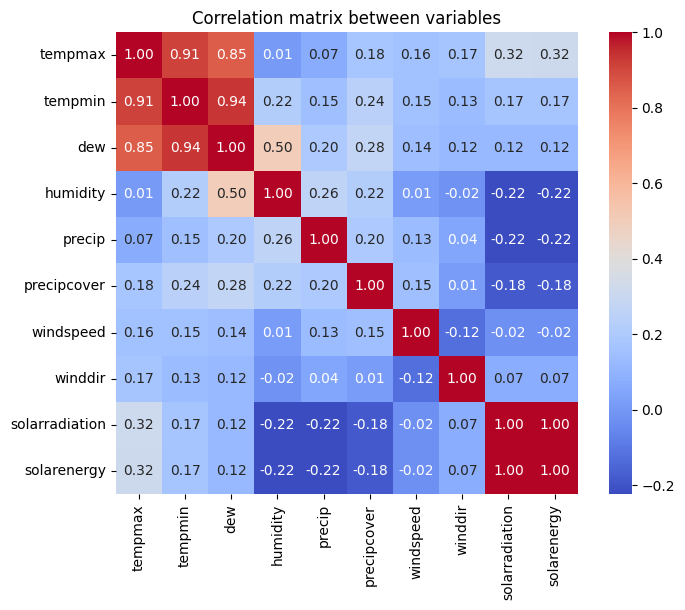

In [ ]:

correlation_matrix = dataa.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation matrix between variables')
plt.show()


In [ ]:
weather = dataa.drop(['solarradiation', 'dew'], axis=1)

In [ ]:
weather.head(1)

,datetime,tempmax,tempmin,humidity,precip,precipcover,windspeed,winddir,solarenergy
0,2010-01-01,18.5,16.0,96.6,1.2,50.0,14.8,44.4,9.7


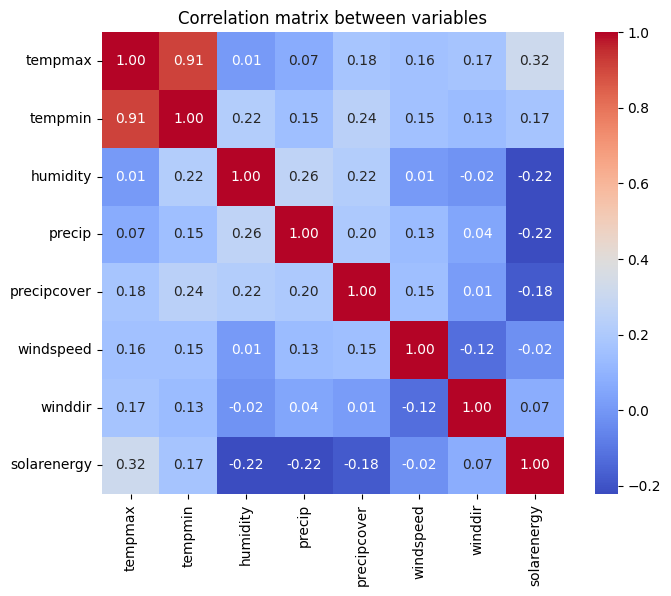

In [ ]:

correlation_matrix = weather.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation matrix between variables')
plt.show()


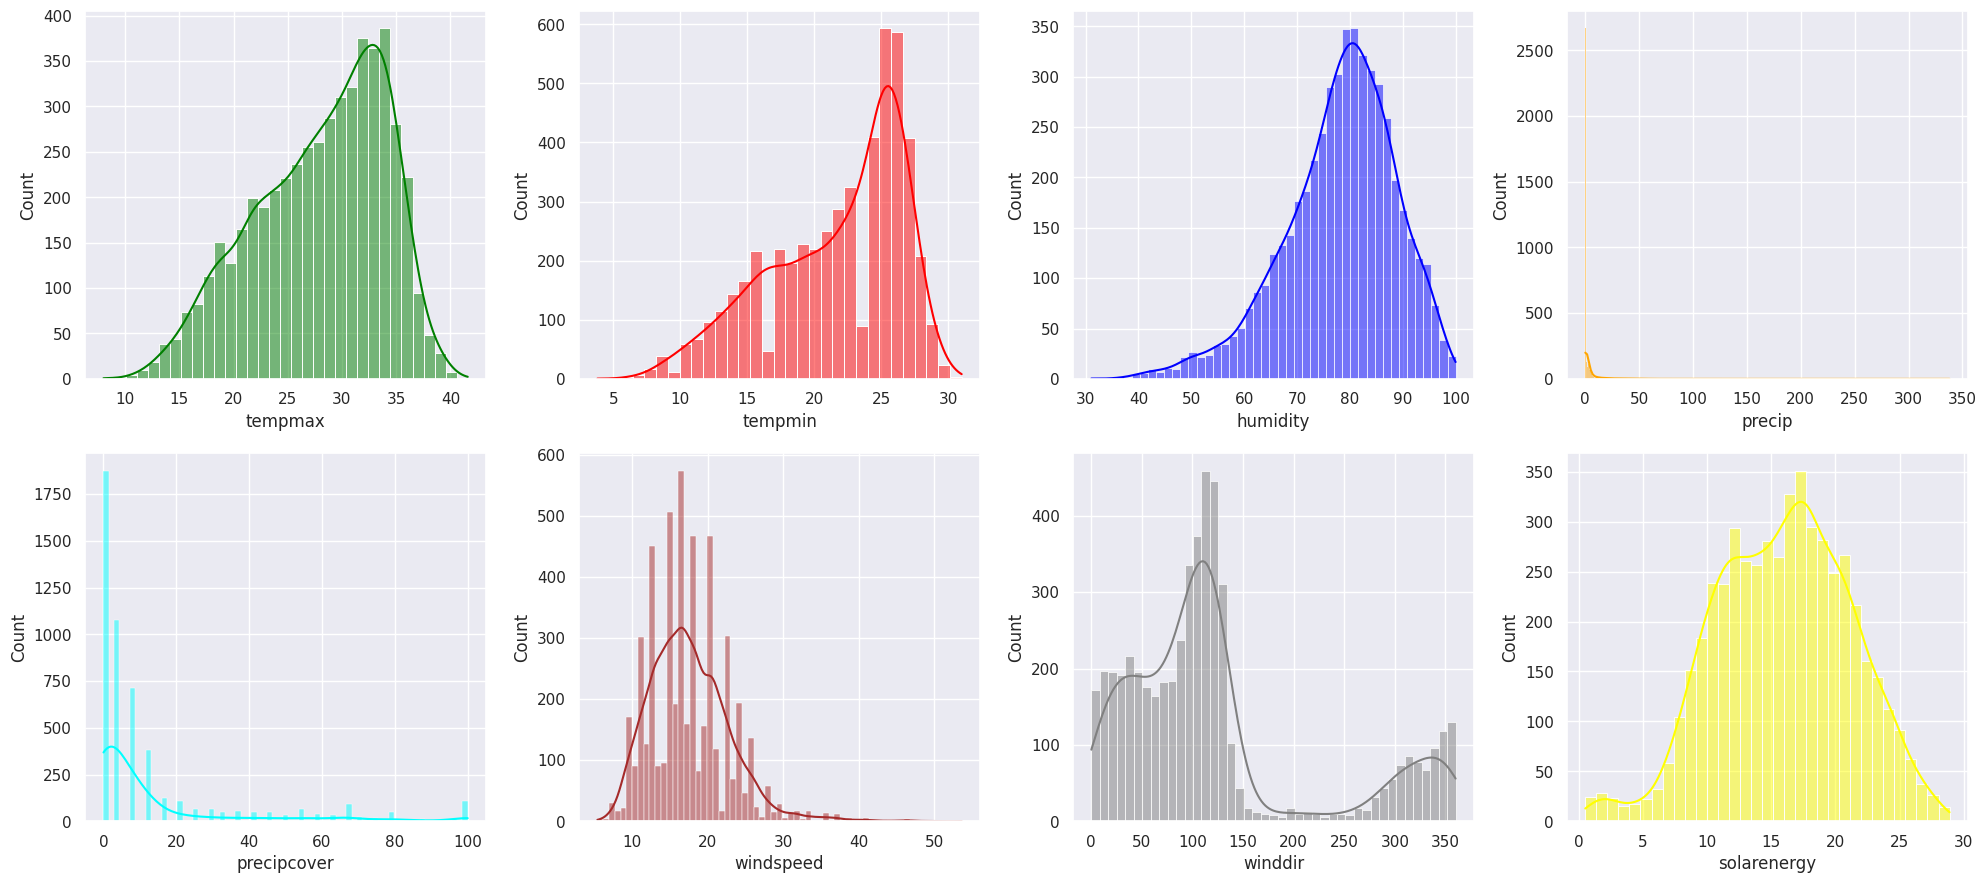

In [ ]:
sns.set(style='darkgrid')
fig, axs = plt.subplots(2, 4, figsize=(20, 9))

sns.histplot(data=weather, x='tempmax', kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=weather, x='tempmin', kde=True, ax=axs[0, 1], color='red')
sns.histplot(data=weather, x='humidity', kde=True, ax=axs[0, 2], color='blue')
sns.histplot(data=weather, x='precip', kde=True, ax=axs[0, 3], color='orange')

sns.histplot(data=weather, x='precipcover', kde=True, ax=axs[1, 0], color='cyan')
sns.histplot(data=weather, x='windspeed', kde=True, ax=axs[1, 1], color='brown')
sns.histplot(data=weather, x='winddir', kde=True, ax=axs[1, 2], color='gray')
sns.histplot(data=weather, x='solarenergy', kde=True, ax=axs[1, 3], color='yellow')

plt.tight_layout()
plt.show()


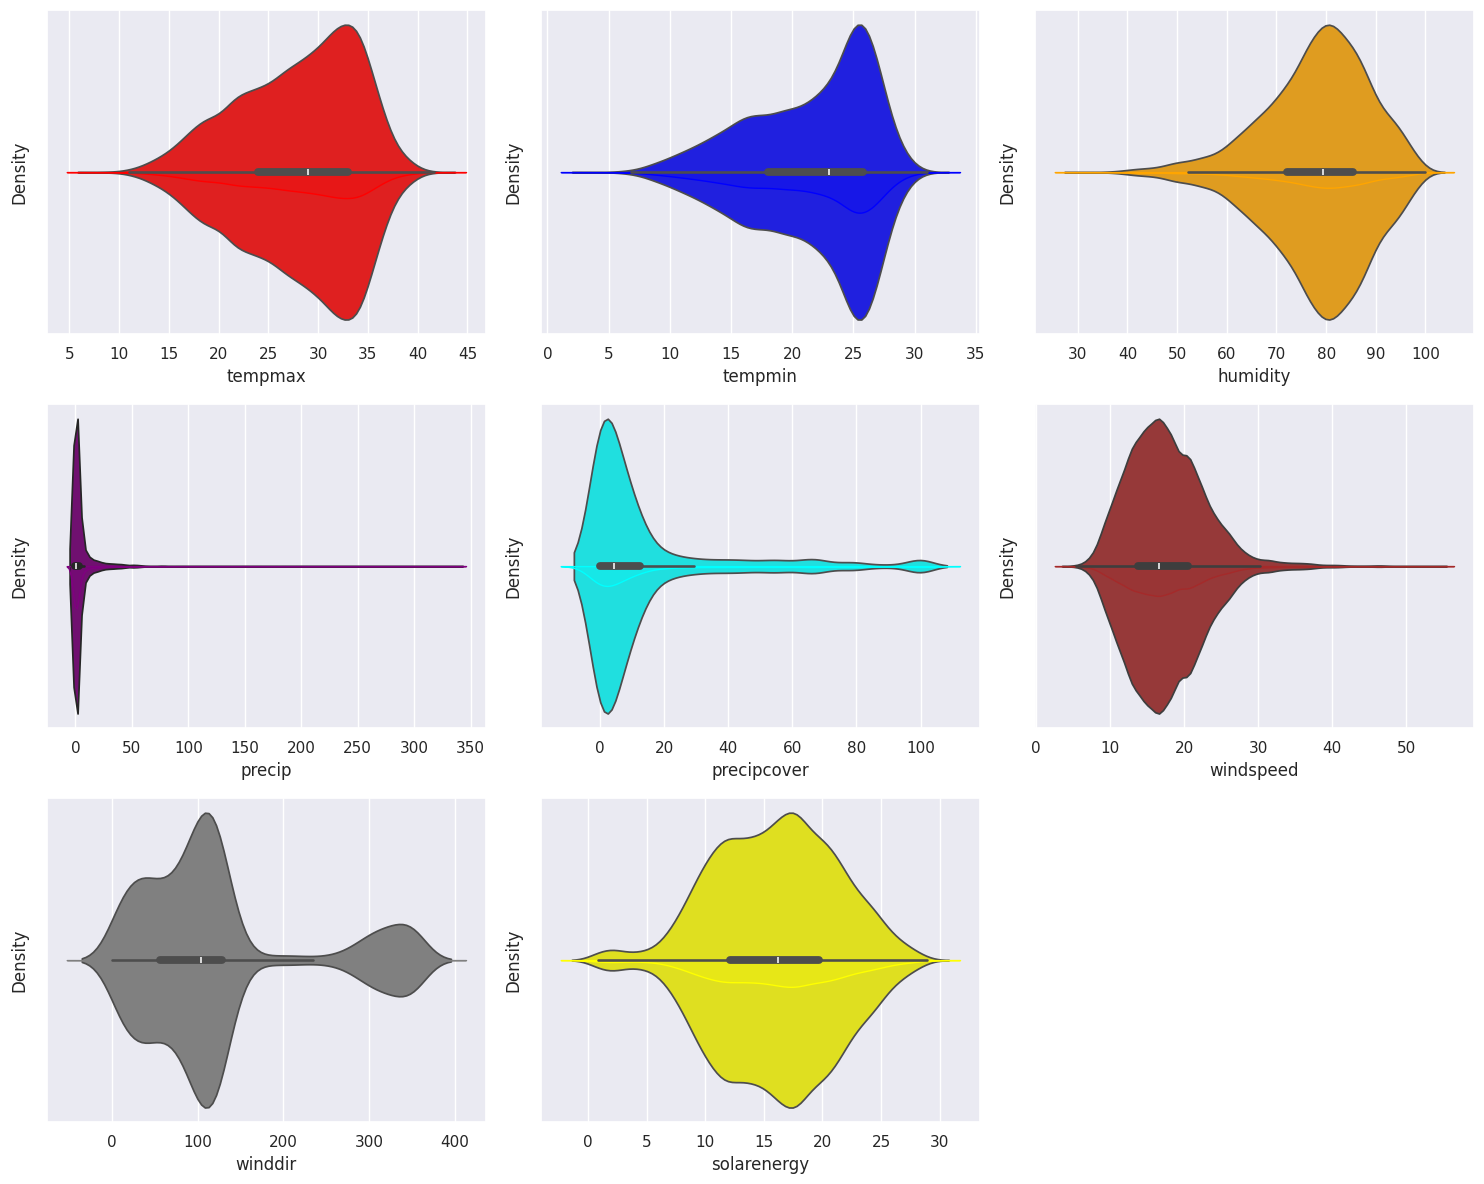

In [ ]:
sns.set(style='darkgrid')
fig, axs = plt.subplots(3, 3, figsize=(15, 12))

sns.violinplot(data=weather, x='tempmax', ax=axs[0, 0], color='red')
sns.kdeplot(data=weather['tempmax'], ax=axs[0, 0], color='red', fill=True)

sns.violinplot(data=weather, x='tempmin', ax=axs[0, 1], color='blue')
sns.kdeplot(data=weather['tempmin'], ax=axs[0, 1], color='blue', fill=True)

sns.violinplot(data=weather, x='humidity', ax=axs[0, 2], color='orange')
sns.kdeplot(data=weather['humidity'], ax=axs[0, 2], color='orange', fill=True)

sns.violinplot(data=weather, x='precip', ax=axs[1, 0], color='purple')
sns.kdeplot(data=weather['precip'], ax=axs[1, 0], color='purple', fill=True)

sns.violinplot(data=weather, x='precipcover', ax=axs[1, 1], color='cyan')
sns.kdeplot(data=weather['precipcover'], ax=axs[1, 1], color='cyan', fill=True)

sns.violinplot(data=weather, x='windspeed', ax=axs[1, 2], color='brown')
sns.kdeplot(data=weather['windspeed'], ax=axs[1, 2], color='brown', fill=True)

sns.violinplot(data=weather, x='winddir', ax=axs[2, 0], color='gray')
sns.kdeplot(data=weather['winddir'], ax=axs[2, 0], color='gray', fill=True)

sns.violinplot(data=weather, x='solarenergy', ax=axs[2, 1], color='yellow')
sns.kdeplot(data=weather['solarenergy'], ax=axs[2, 1], color='yellow', fill=True)

# Remove unused subplot
axs[2, 2].remove()

plt.tight_layout()
plt.show()

In [ ]:

Q1 = weather.quantile(0.25)
Q3 = weather.quantile(0.75)
IQR = Q3 - Q1

# Cal outliers
outliers = ((weather < (Q1 - 1.5 * IQR)) | (weather > (Q3 + 1.5 * IQR)))

# Calculate the total outlier values for each column
outliers_sum = outliers.sum()

print("Total outlier values for each column:")
print(outliers_sum)


Total outlier values for each column:
datetime         0
humidity       118
precip         757
precipcover    712
solarenergy      8
tempmax          3
tempmin          4
winddir        836
windspeed      105
dtype: int64


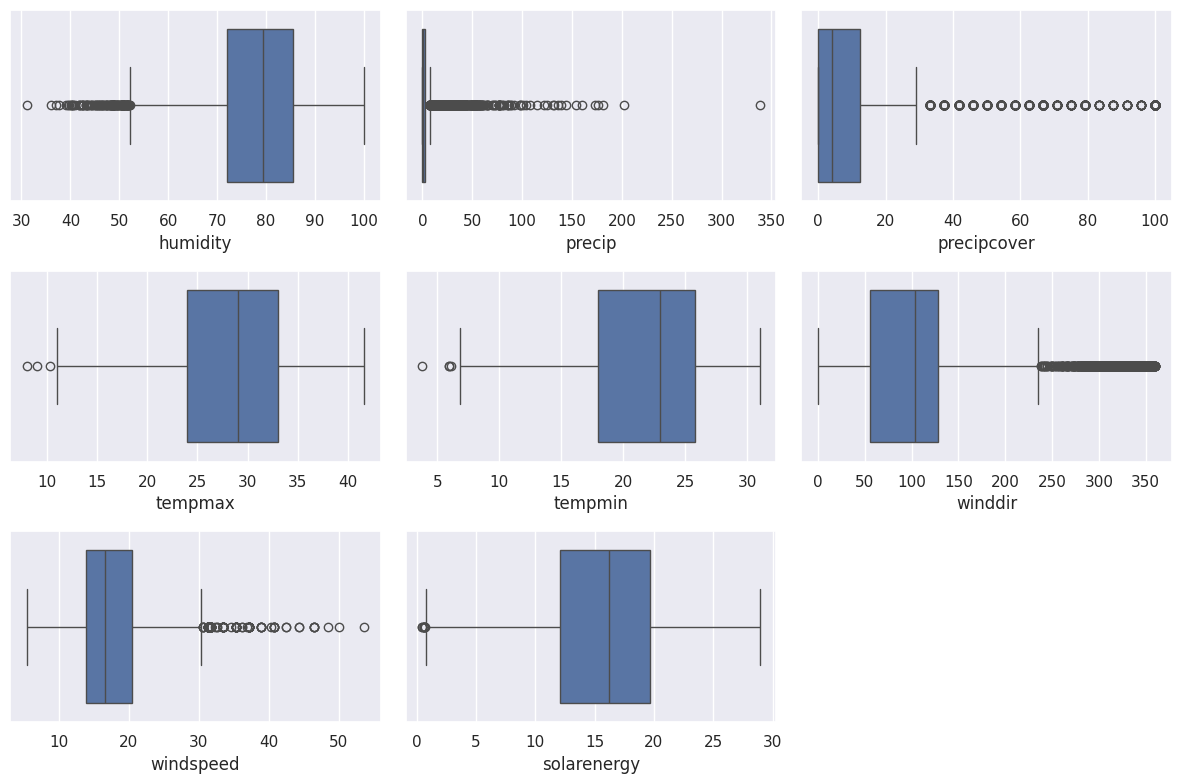

In [ ]:

columns_with_outliers = ['humidity', 'precip', 'precipcover', 'tempmax', 'tempmin', 'winddir', 'windspeed','solarenergy']


plt.figure(figsize=(12, 8))
for i, column in enumerate(columns_with_outliers, start=1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=weather[column])
    plt.xlabel(column)
plt.tight_layout()
plt.show()


In [ ]:
# cal mean
mean_values = weather.mean()

# Replace outliers with the average value of the corresponding column
weather['humidity'] = np.where(outliers['humidity'], mean_values['humidity'], weather['humidity'])
weather['precip'] = np.where(outliers['precip'], mean_values['precip'], weather['precip'])
weather['precipcover'] = np.where(outliers['precipcover'], mean_values['precipcover'], weather['precipcover'])
weather['solarenergy'] = np.where(outliers['solarenergy'], mean_values['solarenergy'], weather['solarenergy'])
weather['tempmax'] = np.where(outliers['tempmax'], mean_values['tempmax'], weather['tempmax'])
weather['tempmin'] = np.where(outliers['tempmin'], mean_values['tempmin'], weather['tempmin'])
weather['winddir'] = np.where(outliers['winddir'], mean_values['winddir'], weather['winddir'])
weather['windspeed'] = np.where(outliers['windspeed'], mean_values['windspeed'], weather['windspeed'])

# Recheck for outliers after performing the replacement
outliers_after_replace = ((weather < (Q1 - 1.5 * IQR)) | (weather > (Q3 + 1.5 * IQR)))
outliers_sum_after_replace = outliers_after_replace.sum()
print("\nTotal outliers for each column after replacing with mean:")
print(outliers_sum_after_replace)


Total outliers for each column after replacing with mean:
datetime       0
humidity       0
precip         0
precipcover    0
solarenergy    0
tempmax        0
tempmin        0
winddir        0
windspeed      0
dtype: int64


In [ ]:
weather.shape

(5128, 9)

In [ ]:
weather['datetime'] = pd.to_datetime(weather['datetime'])

In [ ]:
weather.set_index('datetime', inplace=True)

In [ ]:
weather.head()

,tempmax,tempmin,humidity,precip,precipcover,windspeed,winddir,solarenergy
datetime,,,,,,,,
2010-01-01,18.5,16.0,96.6,1.2,13.411195,14.8,44.4,9.7
2010-01-02,18.0,15.8,92.2,0.2,8.330000,13.0,37.3,10.2
2010-01-03,22.0,17.0,79.6,0.0,0.000000,13.0,85.1,11.7
2010-01-04,22.0,18.0,87.8,0.0,0.000000,14.8,104.3,17.0
2010-01-05,27.0,19.9,86.1,0.0,0.000000,18.4,117.6,18.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Normalize data using the Min-Max Scaling method for columns that need to be normalized
weather_scaled = scaler.fit_transform(weather[['humidity', 'precip', 'tempmax', 'tempmin', 'winddir', 'windspeed', 'precipcover', 'solarenergy']])

# Create a new DataFrame from normalized data
weather_scaled_df = pd.DataFrame(weather_scaled, columns=['humidity', 'precip', 'tempmax', 'tempmin', 'winddir', 'windspeed', 'precipcover', 'solarenergy'])

print(weather_scaled_df.head())

   humidity    precip   tempmax   tempmin   winddir  windspeed  precipcover  \
0  0.928870  0.166667  0.245098  0.380165  0.188486   0.377510     0.459760   
1  0.836820  0.027778  0.228758  0.371901  0.158209   0.305221     0.285567   
2  0.573222  0.000000  0.359477  0.421488  0.362047   0.305221     0.000000   
3  0.744770  0.000000  0.359477  0.462810  0.443923   0.377510     0.000000   
4  0.709205  0.000000  0.522876  0.541322  0.500640   0.522088     0.000000   

   solarenergy  
0     0.316726  
1     0.334520  
2     0.387900  
3     0.576512  
4     0.612100  


## Model tranning
### I. Linear Regression

#### 1. Tempmax

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# choose target for tempmax
target_column_tempmax = 'tempmax'
X_tempmax = weather.drop(columns=[target_column_tempmax])
y_tempmax = weather[target_column_tempmax]

# split train and test for tempmax
X_train_tempmax, X_test_tempmax, y_train_tempmax, y_test_tempmax = train_test_split(X_tempmax, y_tempmax, test_size=0.2, random_state=43)

# linear model for tempmax
model_tempmax = LinearRegression()
model_tempmax.fit(X_train_tempmax, y_train_tempmax)

# predict on test for tempmax
y_pred_test_tempmax = model_tempmax.predict(X_test_tempmax)

# predict on train
y_pred_train_tempmax = model_tempmax.predict(X_train_tempmax)

# Evaluate the model on the test set
mse_test_tempmax = mean_squared_error(y_test_tempmax, y_pred_test_tempmax)
rmse_test_tempmax = mean_squared_error(y_test_tempmax, y_pred_test_tempmax, squared=False)
r2_test_tempmax = r2_score(y_test_tempmax, y_pred_test_tempmax)

# Evaluate the model on the train set
mse_train_tempmax = mean_squared_error(y_train_tempmax, y_pred_train_tempmax)
rmse_train_tempmax = mean_squared_error(y_train_tempmax, y_pred_train_tempmax, squared=False)
r2_train_tempmax = r2_score(y_train_tempmax, y_pred_train_tempmax)

print("Test Set Mean Squared Error for tempmax:", mse_test_tempmax)
print("Train Set Mean Squared Error for tempmax:", mse_train_tempmax)
print("Test Set Root Mean Squared Error for tempmax:", rmse_test_tempmax)
print("Train Set Root Mean Squared Error for tempmax:", rmse_train_tempmax)
print("Test Set R-squared for tempmax:", r2_test_tempmax)
print("Train Set R-squared for tempmax:", r2_train_tempmax)

# Create news DataFrame from test data and predictions of Linear Regression model for tempmax
results_lr_tempmax = pd.DataFrame({'Actual': y_test_tempmax, 'Predicted': y_pred_test_tempmax})
results_lr_tempmax['Model'] = 'Linear Regression'
results_lr_tempmax['Temperature Type'] = 'tempmax'

# Print the last 7 rows for tempmax
print("\nLinear Regression Results for tempmax:")
print(results_lr_tempmax.tail(7))

Test Set Mean Squared Error for tempmax: 4.346374651834435
Train Set Mean Squared Error for tempmax: 4.227681560406169
Test Set Root Mean Squared Error for tempmax: 2.084796069603556
Train Set Root Mean Squared Error for tempmax: 2.056132670915515
Test Set R-squared for tempmax: 0.8814084206355618
Train Set R-squared for tempmax: 0.8809123749479472

Linear Regression Results for tempmax:
            Actual  Predicted              Model Temperature Type
datetime                                                         
2021-01-19    21.0  17.803702  Linear Regression          tempmax
2012-05-03    37.0  36.123734  Linear Regression          tempmax
2012-06-18    36.0  36.839249  Linear Regression          tempmax
2023-03-23    32.3  32.131695  Linear Regression          tempmax
2022-01-23    24.7  23.604535  Linear Regression          tempmax
2016-02-16    16.1  19.532414  Linear Regression          tempmax
2014-02-25    22.0  24.723103  Linear Regression          tempmax


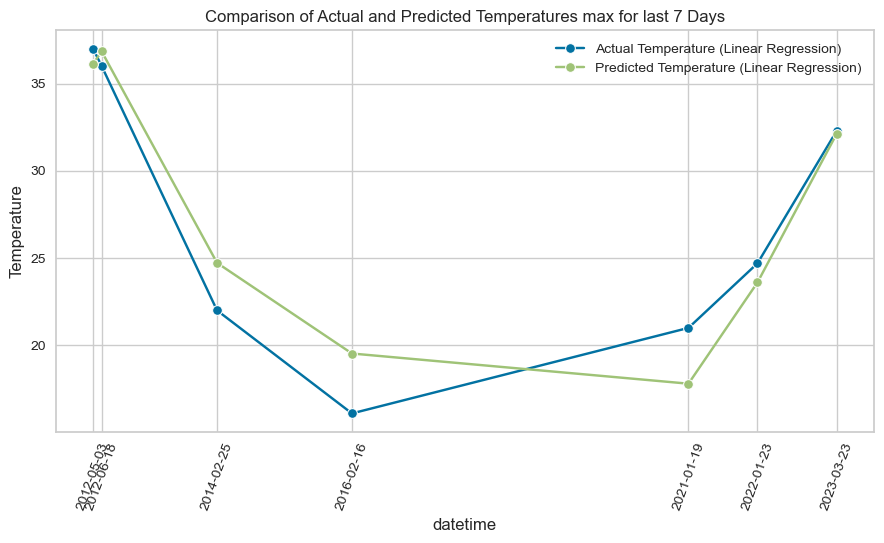

In [ ]:
# last 7 days for tempmax
last_7_days_linear_tempmax = results_lr_tempmax.tail(7)

plt.figure(figsize=(9, 5))
sns.lineplot(data=last_7_days_linear_tempmax, x=last_7_days_linear_tempmax.index, y='Actual', label='Actual Temperature (Linear Regression)', marker='o')
sns.lineplot(data=last_7_days_linear_tempmax, x=last_7_days_linear_tempmax.index, y='Predicted', label='Predicted Temperature (Linear Regression)', marker='o')
plt.ylabel('Temperature')
plt.title('Comparison of Actual and Predicted Temperatures max for last 7 Days')
plt.tight_layout()
plt.legend()

# Set labels for x axis with datetime
plt.xticks(last_7_days_linear_tempmax.index, [date.strftime('%Y-%m-%d') for date in last_7_days_linear_tempmax.index], rotation=70)

plt.show()

#### 2. Tempmin

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# choose target for tempmin
target_column_tempmin = 'tempmin'
X_tempmin = weather.drop(columns=[target_column_tempmin])
y_tempmin = weather[target_column_tempmin]

# split train and test for tempmin
X_train_tempmin, X_test_tempmin, y_train_tempmin, y_test_tempmin = train_test_split(X_tempmin, y_tempmin, test_size=0.2, random_state=43)

# linear model for tempmin
model_tempmin = LinearRegression()
model_tempmin.fit(X_train_tempmin, y_train_tempmin)

# predict on test for tempmin
y_pred_test_tempmin = model_tempmin.predict(X_test_tempmin)

# predict on train for tempmin
y_pred_train_tempmin = model_tempmin.predict(X_train_tempmin)

# Evaluate the model on the test set
mse_test_tempmin = mean_squared_error(y_test_tempmin, y_pred_test_tempmin)
rmse_test_tempmin = mean_squared_error(y_test_tempmin, y_pred_test_tempmin, squared=False)
r2_test_tempmin = r2_score(y_test_tempmin, y_pred_test_tempmin)

# Evaluate the model on the train set
mse_train_tempmin = mean_squared_error(y_train_tempmin, y_pred_train_tempmin)
rmse_train_tempmin = mean_squared_error(y_train_tempmin, y_pred_train_tempmin, squared=False)
r2_train_tempmin = r2_score(y_train_tempmin, y_pred_train_tempmin)

print("Test Set Mean Squared Error for tempmin:", mse_test_tempmin)
print("Train Set Mean Squared Error for tempmin:", mse_train_tempmin)
print("Test Set Root Mean Squared Error for tempmin:", rmse_test_tempmin)
print("Train Set Root Mean Squared Error for tempmin:", rmse_train_tempmin)
print("Test Set R-squared for tempmin:", r2_test_tempmin)
print("Train Set R-squared for tempmin:", r2_train_tempmin)

# Create new DataFrame from test data and predictions of Linear Regression model for tempmin
results_lr_tempmin = pd.DataFrame({'Actual': y_test_tempmin, 'Predicted': y_pred_test_tempmin})
results_lr_tempmin['Model'] = 'Linear Regression'
results_lr_tempmin['Temperature Type'] = 'tempmin'

# Print the last 7 rows for tempmin
print("\nLinear Regression Results for tempmin:")
print(results_lr_tempmin.tail(7))


Test Set Mean Squared Error for tempmin: 3.1989451890639957
Train Set Mean Squared Error for tempmin: 3.131709188850151
Test Set Root Mean Squared Error for tempmin: 1.7885595290803142
Train Set Root Mean Squared Error for tempmin: 1.769663580698363
Test Set R-squared for tempmin: 0.8706715344713349
Train Set R-squared for tempmin: 0.8736702981127094

Linear Regression Results for tempmin:
            Actual  Predicted              Model Temperature Type
datetime                                                         
2021-01-19    10.0  14.419366  Linear Regression          tempmin
2012-05-03    27.0  26.942774  Linear Regression          tempmin
2012-06-18    28.0  26.832149  Linear Regression          tempmin
2023-03-23    24.8  24.454899  Linear Regression          tempmin
2022-01-23    18.0  19.654891  Linear Regression          tempmin
2016-02-16    12.0  10.747345  Linear Regression          tempmin
2014-02-25    18.8  17.456596  Linear Regression          tempmin


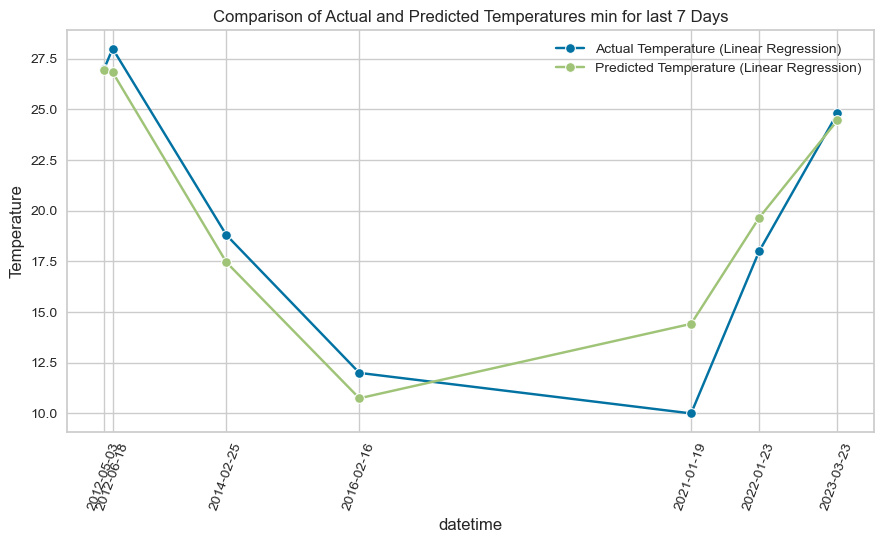

In [ ]:
# last 7 days for tempmax
last_7_days_linear_tempmin = results_lr_tempmin.tail(7)

plt.figure(figsize=(9, 5))
sns.lineplot(data=last_7_days_linear_tempmin, x=last_7_days_linear_tempmin.index, y='Actual', label='Actual Temperature (Linear Regression)', marker='o')
sns.lineplot(data=last_7_days_linear_tempmin, x=last_7_days_linear_tempmin.index, y='Predicted', label='Predicted Temperature (Linear Regression)', marker='o')
plt.ylabel('Temperature')
plt.title('Comparison of Actual and Predicted Temperatures min for last 7 Days')
plt.tight_layout()
plt.legend()

# Set labels for x axis with datetime
plt.xticks(last_7_days_linear_tempmin.index, [date.strftime('%Y-%m-%d') for date in last_7_days_linear_tempmin.index], rotation=70)

plt.show()

### II. Support Vector Regression Model

#### 1. Tempmax

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Select target as tempmax
target_column_tempmax = 'tempmax'
X_tempmax = weather.drop(columns=[target_column_tempmax])
y_tempmax = weather[target_column_tempmax]

# Divide the data into training set and test set
X_train_tempmax_svr, X_test_tempmax_svr, y_train_tempmax_svr, y_test_tempmax_svr = train_test_split(X_tempmax, y_tempmax, test_size=0.2, random_state=43)

# Build the SVR model
svr_model_tempmax = SVR(kernel='rbf')  # Select the kernel function as radial basis function (RBF)
svr_model_tempmax.fit(X_train_tempmax_svr, y_train_tempmax_svr)

# Predict on the test set
y_pred_test_tempmax_svr = svr_model_tempmax.predict(X_test_tempmax_svr)

# Predict on the training set
y_pred_train_tempmax_svr = svr_model_tempmax.predict(X_train_tempmax_svr)

# Evaluate the SVR model on the test set
mse_test_tempmax_svr = mean_squared_error(y_test_tempmax_svr, y_pred_test_tempmax_svr)
rmse_test_tempmax_svr = np.sqrt(mse_test_tempmax_svr)
r2_test_tempmax_svr = r2_score(y_test_tempmax_svr, y_pred_test_tempmax_svr)

# Evaluate the SVR model on the train set
mse_train_tempmax_svr = mean_squared_error(y_train_tempmax_svr, y_pred_train_tempmax_svr)
rmse_train_tempmax_svr = np.sqrt(mse_train_tempmax_svr)
r2_train_tempmax_svr = r2_score(y_train_tempmax_svr, y_pred_train_tempmax_svr)

print("Test Set Mean Squared Error for tempmax (SVR):", mse_test_tempmax_svr)
print("Train Set Mean Squared Error for tempmax (SVR):", mse_train_tempmax_svr)
print("Test Set Root Mean Squared Error for tempmax (SVR):", rmse_test_tempmax_svr)
print("Train Set Root Mean Squared Error for tempmax (SVR):", rmse_train_tempmax_svr)
print("Test Set R-squared for tempmax (SVR):", r2_test_tempmax_svr)
print("Train Set R-squared for tempmax (SVR):", r2_train_tempmax_svr)

# last 7 lines
print("\nSVR Results for tempmax:")
results_svr_tempmax = pd.DataFrame({'Actual': y_test_tempmax_svr, 'Predicted': y_pred_test_tempmax_svr})
results_svr_tempmax['Model'] = 'SVR'
results_svr_tempmax['Temperature Type'] = 'tempmax'
print(results_svr_tempmax.tail(7))


Test Set Mean Squared Error for tempmax (SVR): 4.882487789519589
Train Set Mean Squared Error for tempmax (SVR): 4.943606834468043
Test Set Root Mean Squared Error for tempmax (SVR): 2.20963521639197
Train Set Root Mean Squared Error for tempmax (SVR): 2.2234223248110205
Test Set R-squared for tempmax (SVR): 0.866780481534805
Train Set R-squared for tempmax (SVR): 0.860745803888944

SVR Results for tempmax:
            Actual  Predicted Model Temperature Type
datetime                                            
2021-01-19    21.0  20.793494   SVR          tempmax
2012-05-03    37.0  35.963231   SVR          tempmax
2012-06-18    36.0  36.417938   SVR          tempmax
2023-03-23    32.3  32.033618   SVR          tempmax
2022-01-23    24.7  24.613381   SVR          tempmax
2016-02-16    16.1  20.460785   SVR          tempmax
2014-02-25    22.0  25.087836   SVR          tempmax


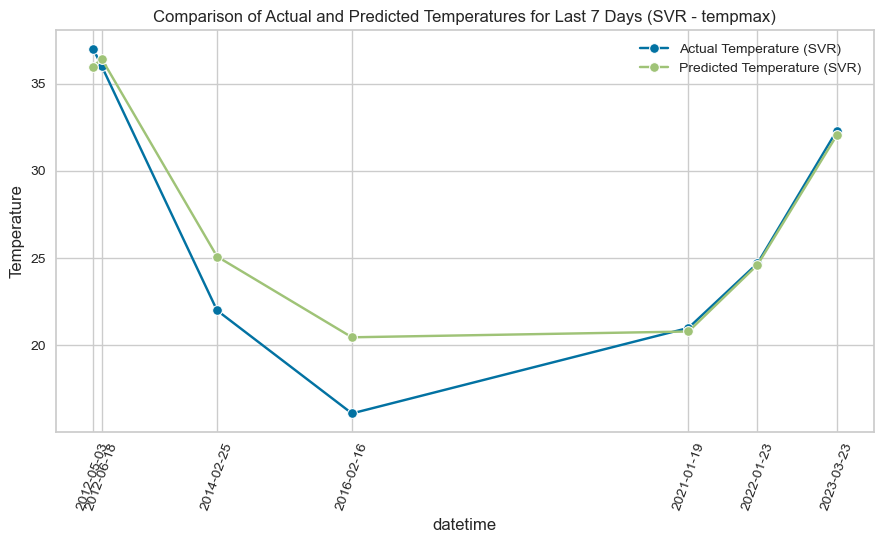

In [ ]:
# Take 7 days
last_7_days_svr_tempmax = results_svr_tempmax.tail(7)

plt.figure(figsize=(9, 5))
sns.lineplot(data=last_7_days_svr_tempmax, x=last_7_days_svr_tempmax.index, y='Actual', label='Actual Temperature (SVR)', marker='o')
sns.lineplot(data=last_7_days_svr_tempmax, x=last_7_days_svr_tempmax.index, y='Predicted', label='Predicted Temperature (SVR)', marker='o')
plt.ylabel('Temperature')
plt.title('Comparison of Actual and Predicted Temperatures for Last 7 Days (SVR - tempmax)')
plt.tight_layout()
plt.legend()

plt.xticks(last_7_days_svr_tempmax.index, [date.strftime('%Y-%m-%d') for date in last_7_days_svr_tempmax.index], rotation=70)

plt.show()


#### 2. Tempmin

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# choose target as tempmin
target_column_tempmin = 'tempmin'
X_tempmin = weather.drop(columns=[target_column_tempmin])
y_tempmin = weather[target_column_tempmin]

# Divide the data into training set and test set
X_train_tempmin_svr, X_test_tempmin_svr, y_train_tempmin_svr, y_test_tempmin_svr = train_test_split(X_tempmin, y_tempmin, test_size=0.2, random_state=43)

# Build SVR model for tempmin
svr_model_tempmin = SVR(kernel='rbf')  # Select the kernel function as radial basis function (RBF)
svr_model_tempmin.fit(X_train_tempmin_svr, y_train_tempmin_svr)

# Predict on the test set
y_pred_test_tempmin_svr = svr_model_tempmin.predict(X_test_tempmin_svr)

# Predict on the training set
y_pred_train_tempmin_svr = svr_model_tempmin.predict(X_train_tempmin_svr)

# Evaluate the SVR model on the test set
mse_test_tempmin_svr = mean_squared_error(y_test_tempmin_svr, y_pred_test_tempmin_svr)
rmse_test_tempmin_svr = np.sqrt(mse_test_tempmin_svr)
r2_test_tempmin_svr = r2_score(y_test_tempmin_svr, y_pred_test_tempmin_svr)

# Evaluate the SVR model on the training set
mse_train_tempmin_svr = mean_squared_error(y_train_tempmin_svr, y_pred_train_tempmin_svr)
rmse_train_tempmin_svr = np.sqrt(mse_train_tempmin_svr)
r2_train_tempmin_svr = r2_score(y_train_tempmin_svr, y_pred_train_tempmin_svr)

print("Test Set Mean Squared Error for tempmin (SVR):", mse_test_tempmin_svr)
print("Train Set Mean Squared Error for tempmin (SVR):", mse_train_tempmin_svr)
print("Test Set Root Mean Squared Error for tempmin (SVR):", rmse_test_tempmin_svr)
print("Train Set Root Mean Squared Error for tempmin (SVR):", rmse_train_tempmin_svr)
print("Test Set R-squared for tempmin (SVR):", r2_test_tempmin_svr)
print("Train Set R-squared for tempmin (SVR):", r2_train_tempmin_svr)


print("\nSVR Results for tempmin:")
results_svr_tempmin = pd.DataFrame({'Actual': y_test_tempmin_svr, 'Predicted': y_pred_test_tempmin_svr})
results_svr_tempmin['Model'] = 'SVR'
results_svr_tempmin['Temperature Type'] = 'tempmin'
print(results_svr_tempmin.tail(7))

Test Set Mean Squared Error for tempmin (SVR): 3.5112543484339143
Train Set Mean Squared Error for tempmin (SVR): 3.5358816765090624
Test Set Root Mean Squared Error for tempmin (SVR): 1.8738341304485608
Train Set Root Mean Squared Error for tempmin (SVR): 1.880394021610647
Test Set R-squared for tempmin (SVR): 0.8580453524129681
Train Set R-squared for tempmin (SVR): 0.8573664247968917

SVR Results for tempmin:
            Actual  Predicted Model Temperature Type
datetime                                            
2021-01-19    10.0  15.262272   SVR          tempmin
2012-05-03    27.0  26.802281   SVR          tempmin
2012-06-18    28.0  26.674774   SVR          tempmin
2023-03-23    24.8  24.562338   SVR          tempmin
2022-01-23    18.0  20.918021   SVR          tempmin
2016-02-16    12.0  12.884694   SVR          tempmin
2014-02-25    18.8  18.588623   SVR          tempmin


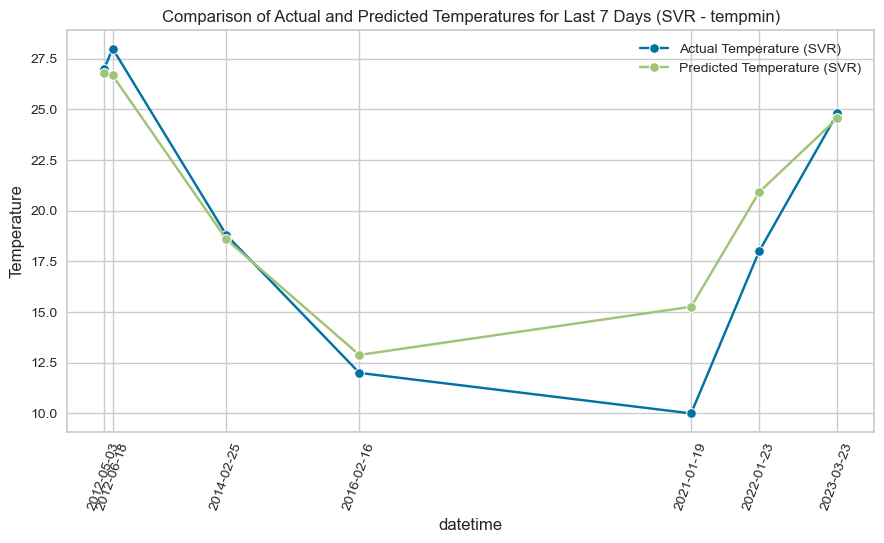

In [ ]:
# Get the last 7 days
last_7_days_svr_tempmin = results_svr_tempmin.tail(7)

plt.figure(figsize=(9, 5))
sns.lineplot(data=last_7_days_svr_tempmin, x=last_7_days_svr_tempmin.index, y='Actual', label='Actual Temperature (SVR)', marker='o')
sns.lineplot(data=last_7_days_svr_tempmin, x=last_7_days_svr_tempmin.index, y='Predicted', label='Predicted Temperature (SVR)', marker='o')
plt.ylabel('Temperature')
plt.title('Comparison of Actual and Predicted Temperatures for Last 7 Days (SVR - tempmin)')
plt.tight_layout()
plt.legend()

plt.xticks(last_7_days_svr_tempmin.index, [date.strftime('%Y-%m-%d') for date in last_7_days_svr_tempmin.index], rotation=70)

plt.show()


### III. XGBoost Model

#### 1. Tempmax

In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Select target as tempmax
target_column_tempmax = 'tempmax'
X_tempmax = weather.drop(columns=[target_column_tempmax])
y_tempmax = weather[target_column_tempmax]

# Divide the data into training set and test set
X_train_tempmax, X_test_tempmax, y_train_tempmax, y_test_tempmax = train_test_split(X_tempmax, y_tempmax, test_size=0.2, random_state=43)

# Build the XGBoost model
xgb_model_tempmax = xgb.XGBRegressor()
xgb_model_tempmax.fit(X_train_tempmax, y_train_tempmax)

# Predict on the test set
y_pred_test_tempmax_xgb = xgb_model_tempmax.predict(X_test_tempmax)

# Predict on the training set
y_pred_train_tempmax_xgb = xgb_model_tempmax.predict(X_train_tempmax)


# Evaluate the XGBoost model on the test set
mse_test_tempmax_xgb = mean_squared_error(y_test_tempmax, y_pred_test_tempmax_xgb)
rmse_test_tempmax_xgb = np.sqrt(mse_test_tempmax_xgb)
r2_test_tempmax_xgb = r2_score(y_test_tempmax, y_pred_test_tempmax_xgb)

# Evaluate the XGBoost model on the training set
mse_train_tempmax_xgb = mean_squared_error(y_train_tempmax, y_pred_train_tempmax_xgb)
rmse_train_tempmax_xgb = np.sqrt(mse_train_tempmax_xgb)
r2_train_tempmax_xgb = r2_score(y_train_tempmax, y_pred_train_tempmax_xgb)

print("Test Set Mean Squared Error for tempmax (XGBoost):", mse_test_tempmax_xgb)
print("Train Set Mean Squared Error for tempmax (XGBoost):", mse_train_tempmax_xgb)
print("Test Set Root Mean Squared Error for tempmax (XGBoost):", rmse_test_tempmax_xgb)
print("Train Set Root Mean Squared Error for tempmax (XGBoost):", rmse_train_tempmax_xgb)
print("Test Set R-squared for tempmax (XGBoost):", r2_test_tempmax_xgb)
print("Train Set R-squared for tempmax (XGBoost):", r2_train_tempmax_xgb)

print("\nXGBoost Results for tempmax:")
results_xgb_tempmax = pd.DataFrame({'Actual': y_test_tempmax, 'Predicted': y_pred_test_tempmax_xgb})
results_xgb_tempmax['Model'] = 'XGBoost'
results_xgb_tempmax['Temperature Type'] = 'tempmax'
print(results_xgb_tempmax.tail(7))


Test Set Mean Squared Error for tempmax (XGBoost): 3.693283223491405
Train Set Mean Squared Error for tempmax (XGBoost): 0.7455564755859758
Test Set Root Mean Squared Error for tempmax (XGBoost): 1.9217916701587103
Train Set Root Mean Squared Error for tempmax (XGBoost): 0.8634561225597834
Test Set R-squared for tempmax (XGBoost): 0.899228132501378
Train Set R-squared for tempmax (XGBoost): 0.9789987612001736

XGBoost Results for tempmax:
            Actual  Predicted    Model Temperature Type
datetime                                               
2021-01-19    21.0  20.449900  XGBoost          tempmax
2012-05-03    37.0  37.220024  XGBoost          tempmax
2012-06-18    36.0  37.417812  XGBoost          tempmax
2023-03-23    32.3  32.811668  XGBoost          tempmax
2022-01-23    24.7  22.178982  XGBoost          tempmax
2016-02-16    16.1  19.025278  XGBoost          tempmax
2014-02-25    22.0  23.301252  XGBoost          tempmax


#### Comment: When looking at the MSE, RMSE and R^2 values, we can see that the difference between the train and test files is quite large. Maybe this is a sign of overfitting so I will draw a chart to check that

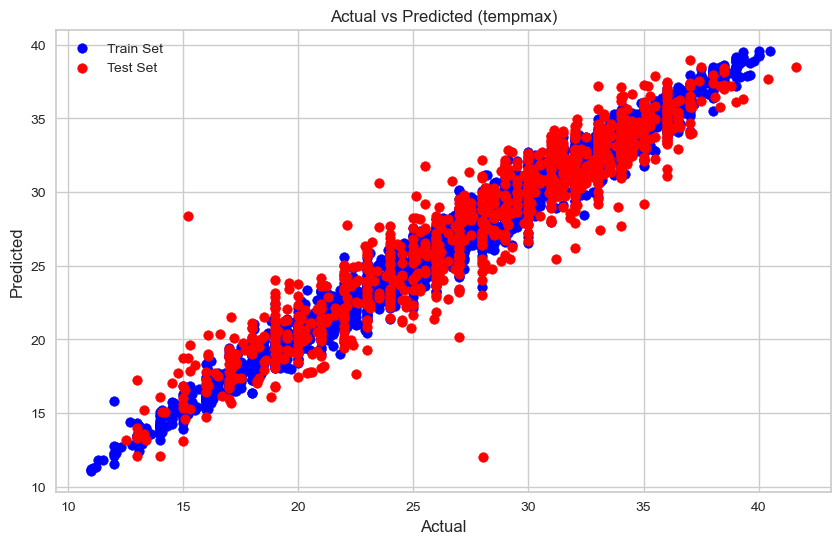

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(y_train_tempmax, y_pred_train_tempmax_xgb, color='blue', label='Train Set')
plt.scatter(y_test_tempmax, y_pred_test_tempmax_xgb, color='red', label='Test Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (tempmax)')
plt.legend()
plt.show()


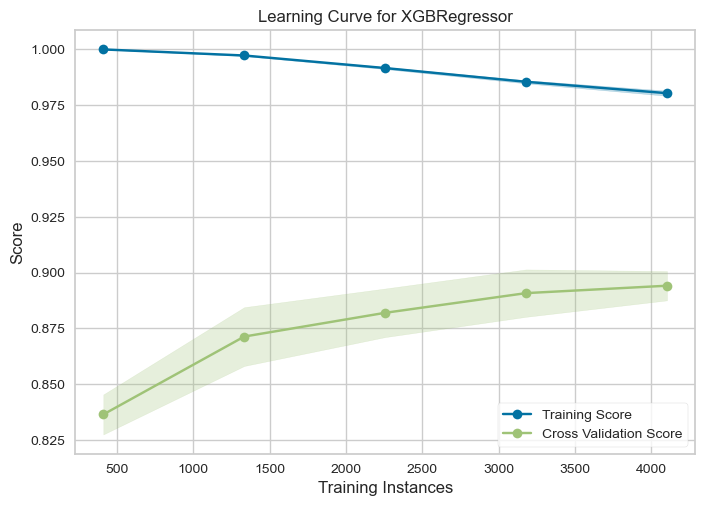

<Axes: title={'center': 'Learning Curve for XGBRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
from yellowbrick.model_selection import LearningCurve

# Create the learning curve visualizer
visualizer = LearningCurve(
    xgb_model_tempmax, scoring='r2', train_size=np.linspace(0.1, 1.0, 10),
    n_jobs=-1, random_state=42
)

# Fit the data to the visualizer
visualizer.fit(X_tempmax, y_tempmax)

# Finalize and show the plot
visualizer.show()


In [ ]:
pip install yellowbrick

     -------------------------------------- 282.6/282.6 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


#### Overfitting mitigation using hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters values you want to test
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_lambda': [0.1, 1, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model_tempmax, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Conduct a search for the best hyperparameter
grid_search.fit(X_train_tempmax, y_train_tempmax)

print("Best Parameters:", grid_search.best_params_)



Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 200, 'reg_lambda': 10, 'subsample': 0.6}


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Create an XGBoost model with the best hyperparameters found
best_xgb_model = xgb.XGBRegressor(colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, reg_lambda=10, subsample=0.6)

# Train the model on the entire training set
best_xgb_model.fit(X_train_tempmax, y_train_tempmax)

# Predict on the training set and test set
y_pred_train = best_xgb_model.predict(X_train_tempmax)
y_pred_test = best_xgb_model.predict(X_test_tempmax)

# Evaluate the model on the training set and test set
mse_train = mean_squared_error(y_train_tempmax, y_pred_train)
mse_test = mean_squared_error(y_test_tempmax, y_pred_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
r2_train = r2_score(y_train_tempmax, y_pred_train)
r2_test = r2_score(y_test_tempmax, y_pred_test)

print("Test Set Mean Squared Error:", mse_test)
print("Train Set Mean Squared Error:", mse_train)
print("Test Set Root Mean Squared Error:", rmse_test)
print("Train Set Root Mean Squared Error:", rmse_train)
print("Test Set R-squared:", r2_test)
print("Train Set R-squared:", r2_train)


# the last 7 data samples on the test set
print("\nXGBoost Results for tempmax:")
results_xgb_tempmax = pd.DataFrame({'Actual': y_test_tempmax, 'Predicted': y_pred_test})
results_xgb_tempmax['Model'] = 'XGBoost'
results_xgb_tempmax['Temperature Type'] = 'tempmax'
print(results_xgb_tempmax.tail(7))



Test Set Mean Squared Error: 3.124920987111419
Train Set Mean Squared Error: 1.8292166271963441
Test Set Root Mean Squared Error: 1.7677446046053766
Train Set Root Mean Squared Error: 1.352485351934114
Test Set R-squared: 0.9147359938025106
Train Set R-squared: 0.9484736348454753

XGBoost Results for tempmax:
            Actual  Predicted    Model Temperature Type
datetime                                               
2021-01-19    21.0  21.234159  XGBoost          tempmax
2012-05-03    37.0  37.121212  XGBoost          tempmax
2012-06-18    36.0  36.521019  XGBoost          tempmax
2023-03-23    32.3  31.594252  XGBoost          tempmax
2022-01-23    24.7  22.514416  XGBoost          tempmax
2016-02-16    16.1  18.661448  XGBoost          tempmax
2014-02-25    22.0  23.815035  XGBoost          tempmax


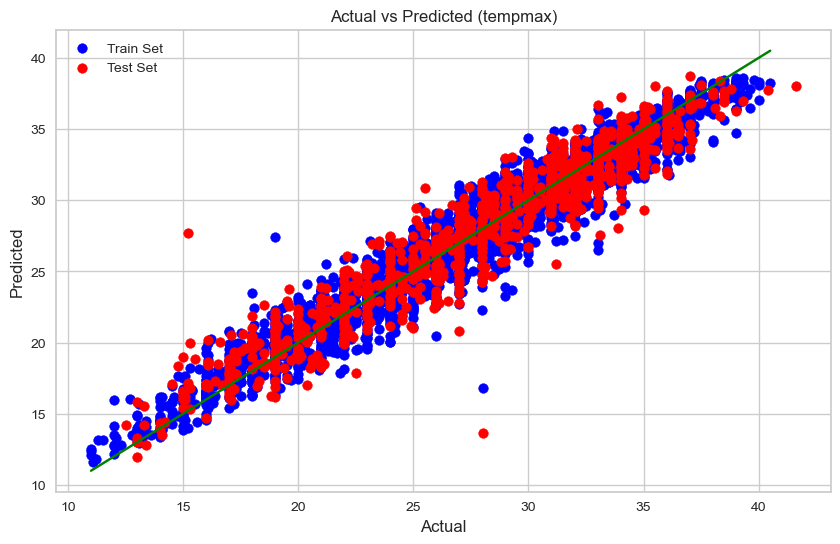

In [ ]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values for train and test set
plt.figure(figsize=(10, 6))

plt.scatter(y_train_tempmax, y_pred_train, color='blue', label='Train Set')
plt.scatter(y_test_tempmax, y_pred_test, color='red', label='Test Set')

plt.plot([min(y_train_tempmax), max(y_train_tempmax)], [min(y_train_tempmax), max(y_train_tempmax)], color='green')

plt.title('Actual vs Predicted (tempmax)')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.legend()
plt.show()


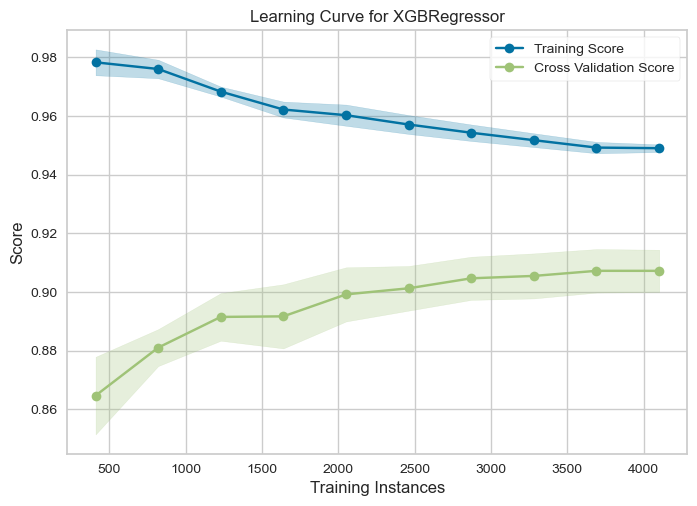

<Axes: title={'center': 'Learning Curve for XGBRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
from yellowbrick.model_selection import LearningCurve

# Create the learning curve visualizer
visualizer = LearningCurve(
    best_xgb_model, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1, random_state=42
)

# Fit the data to the visualizer
visualizer.fit(X_tempmax, y_tempmax)

# Finalize and show the plot
visualizer.show()


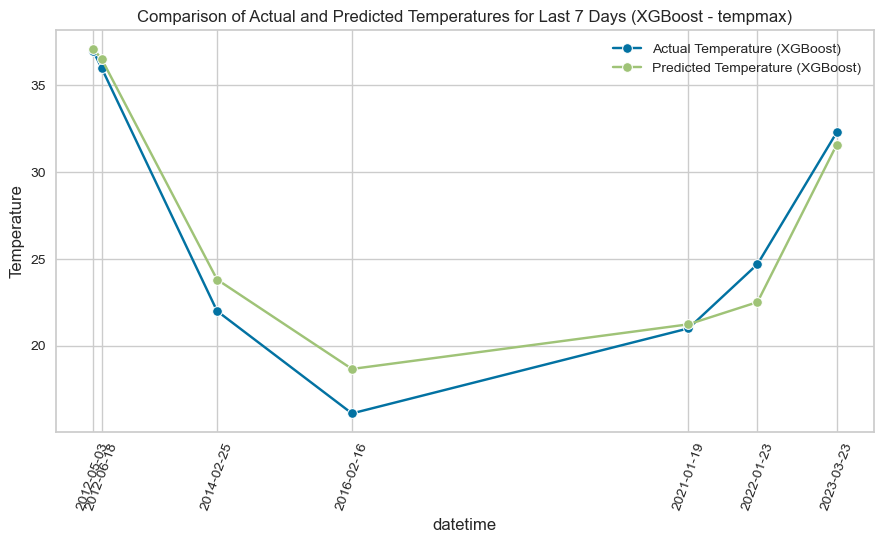

In [ ]:
# Take the last 7
last_7_days_xgb_tempmax = results_xgb_tempmax.tail(7)

plt.figure(figsize=(9, 5))
sns.lineplot(data=last_7_days_xgb_tempmax, x=last_7_days_xgb_tempmax.index, y='Actual', label='Actual Temperature (XGBoost)', marker='o')
sns.lineplot(data=last_7_days_xgb_tempmax, x=last_7_days_xgb_tempmax.index, y='Predicted', label='Predicted Temperature (XGBoost)', marker='o')
plt.ylabel('Temperature')
plt.title('Comparison of Actual and Predicted Temperatures for Last 7 Days (XGBoost - tempmax)')
plt.tight_layout()
plt.legend()

plt.xticks(last_7_days_xgb_tempmax.index, [date.strftime('%Y-%m-%d') for date in last_7_days_xgb_tempmax.index], rotation=70)

plt.show()




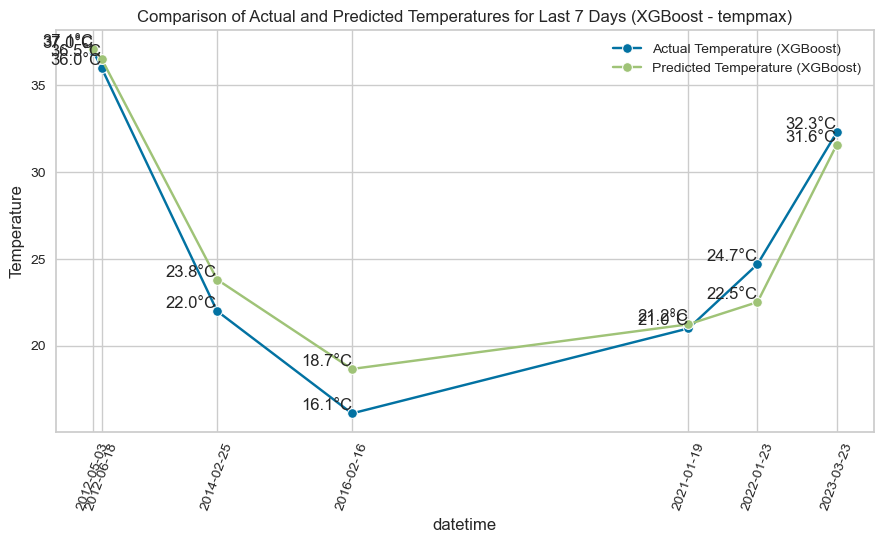

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Take the last 7
last_7_days_xgb_tempmax = results_xgb_tempmax.tail(7)

plt.figure(figsize=(9, 5))
sns.lineplot(data=last_7_days_xgb_tempmax, x=last_7_days_xgb_tempmax.index, y='Actual', label='Actual Temperature (XGBoost)', marker='o')
sns.lineplot(data=last_7_days_xgb_tempmax, x=last_7_days_xgb_tempmax.index, y='Predicted', label='Predicted Temperature (XGBoost)', marker='o')
for i, (_, row) in enumerate(last_7_days_xgb_tempmax.iterrows()):
    plt.text(row.name, row['Actual'], f"{row['Actual']:.1f}°C", ha='right', va='bottom')
    plt.text(row.name, row['Predicted'], f"{row['Predicted']:.1f}°C", ha='right', va='bottom')
plt.ylabel('Temperature')
plt.title('Comparison of Actual and Predicted Temperatures for Last 7 Days (XGBoost - tempmax)')
plt.tight_layout()
plt.legend()

plt.xticks(last_7_days_xgb_tempmax.index, [date.strftime('%Y-%m-%d') for date in last_7_days_xgb_tempmax.index], rotation=70)

plt.show()


### Tempmin

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split

# Select target as tempmin
target_column_tempmin = 'tempmin'
X_tempmin = weather.drop(columns=[target_column_tempmin])
y_tempmin = weather[target_column_tempmin]

# Divide the data into training set and test set
X_train_tempmin, X_test_tempmin, y_train_tempmin, y_test_tempmin = train_test_split(X_tempmin, y_tempmin, test_size=0.2, random_state=43)

# Build the XGBoost model
xgb_model_tempmin = XGBRegressor()
xgb_model_tempmin.fit(X_train_tempmin, y_train_tempmin)

# Predict on the test set
y_pred_test_tempmin_xgb = xgb_model_tempmin.predict(X_test_tempmin)

# Predict on the train set
y_pred_train_tempmin_xgb = xgb_model_tempmin.predict(X_train_tempmin)

# Evaluate the XGBoost model on the test set
mse_test_tempmin_xgb = mean_squared_error(y_test_tempmin, y_pred_test_tempmin_xgb)
rmse_test_tempmin_xgb = np.sqrt(mse_test_tempmin_xgb)
r2_test_tempmin_xgb = r2_score(y_test_tempmin, y_pred_test_tempmin_xgb)

# Evaluate the XGBoost model on the training set
mse_train_tempmin_xgb = mean_squared_error(y_train_tempmin, y_pred_train_tempmin_xgb)
r2_train_tempmin_xgb = r2_score(y_train_tempmin, y_pred_train_tempmin_xgb)
rmse_train_tempmin_xgb = np.sqrt(mse_train_tempmin_xgb)

print("Test Set Mean Squared Error for tempmin (XGBoost):", mse_test_tempmin_xgb)
print("Train Set Mean Squared Error for tempmin (XGBoost):", mse_train_tempmin_xgb)
print("Test Set R-squared for tempmin (XGBoost):", r2_test_tempmin_xgb)
print("Train Set R-squared for tempmin (XGBoost):", r2_train_tempmin_xgb)
print("Test Set Root Mean Squared Error for tempmin (XGBoost):", rmse_test_tempmin_xgb)
print("Train Set Root Mean Squared Error for tempmax (XGBoost):", rmse_train_tempmin_xgb)


print("\nXGBoost Results for tempmin:")
results_xgb_tempmin = pd.DataFrame({'Actual': y_test_tempmin, 'Predicted': y_pred_test_tempmin_xgb})
results_xgb_tempmin['Model'] = 'XGBoost'
results_xgb_tempmin['Temperature Type'] = 'tempmin'
print(results_xgb_tempmin.tail(7))




Test Set Mean Squared Error for tempmin (XGBoost): 2.5113715664677136
Train Set Mean Squared Error for tempmin (XGBoost): 0.509841409569159
Test Set R-squared for tempmin (XGBoost): 0.8984690853178943
Train Set R-squared for tempmin (XGBoost): 0.9794335586746111
Test Set Root Mean Squared Error for tempmin (XGBoost): 1.584730755197145
Train Set Root Mean Squared Error for tempmax (XGBoost): 0.7140317987100848

XGBoost Results for tempmin:
            Actual  Predicted    Model Temperature Type
datetime                                               
2021-01-19    10.0  12.481799  XGBoost          tempmin
2012-05-03    27.0  27.751976  XGBoost          tempmin
2012-06-18    28.0  26.629633  XGBoost          tempmin
2023-03-23    24.8  24.643600  XGBoost          tempmin
2022-01-23    18.0  21.028711  XGBoost          tempmin
2016-02-16    12.0  13.027866  XGBoost          tempmin
2014-02-25    18.8  18.687027  XGBoost          tempmin


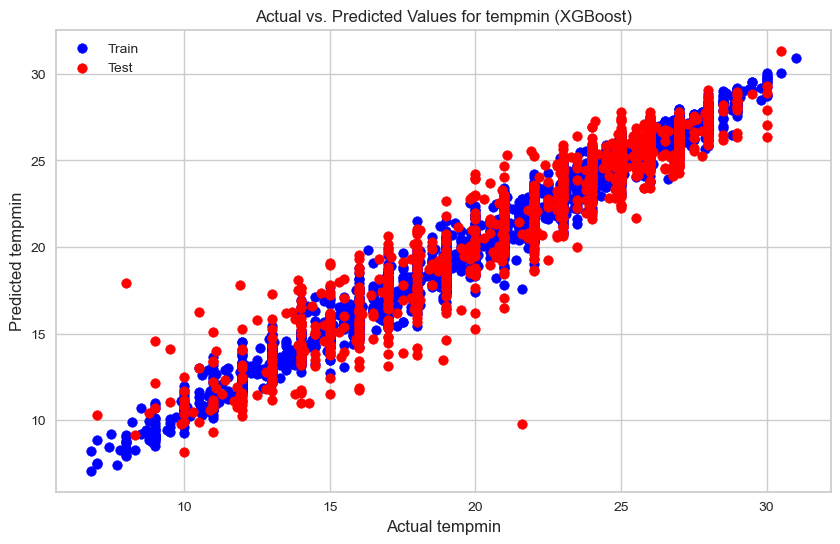

In [ ]:


# Plotting the predicted values against the actual values for tempmin
plt.figure(figsize=(10, 6))

# Scatter plot for training set
plt.scatter(y_train_tempmin, y_pred_train_tempmin_xgb, color='blue', label='Train')

# Scatter plot for test set
plt.scatter(y_test_tempmin, y_pred_test_tempmin_xgb, color='red', label='Test')

# Adding labels and title
plt.title('Actual vs. Predicted Values for tempmin (XGBoost)')
plt.xlabel('Actual tempmin')
plt.ylabel('Predicted tempmin')
plt.legend()
plt.grid(True)
plt.show()


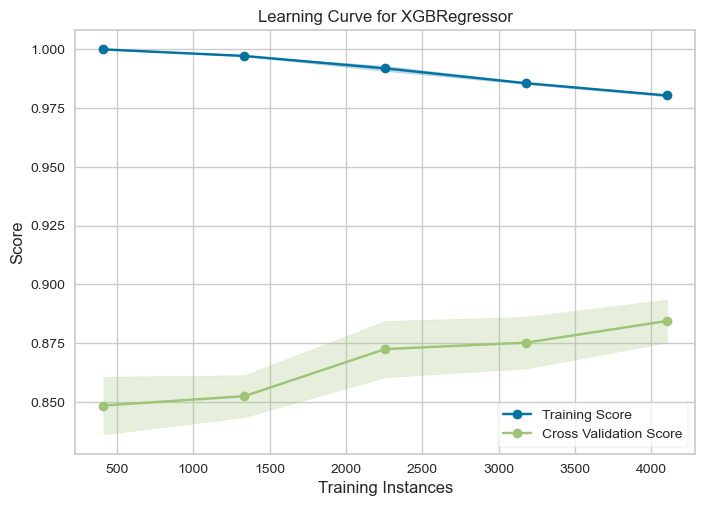

<Axes: title={'center': 'Learning Curve for XGBRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
from yellowbrick.model_selection import LearningCurve

# Create the learning curve visualizer
visualizer = LearningCurve(
    xgb_model_tempmin, scoring='r2', train_size=np.linspace(0.1, 1.0, 10),
    n_jobs=-1, random_state=42
)

# Fit the data to the visualizer
visualizer.fit(X_tempmin, y_tempmin)

# Finalize and show the plot
visualizer.show()


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import uniform, randint
import numpy as np

# Select target as tempmin
target_column_tempmin = 'tempmin'
X_tempmin = weather.drop(columns=[target_column_tempmin])
y_tempmin = weather[target_column_tempmin]

# Divide the data into training set and test set
X_train_tempmin, X_test_tempmin, y_train_tempmin, y_test_tempmin = train_test_split(X_tempmin, y_tempmin, test_size=0.2, random_state=43)

# Define the XGBoost model
xgb_model = XGBRegressor()

# Define the hyperparameter grid
param_grid = {
    'learning_rate': uniform(0.01, 0.3),  # Continuous uniform distribution
    'n_estimators': randint(100, 500),     # Discrete uniform distribution
    'max_depth': randint(3, 10),           # Discrete uniform distribution
    'min_child_weight': randint(1, 6),     # Discrete uniform distribution
    'gamma': uniform(0, 0.5),              # Continuous uniform distribution
    'subsample': uniform(0.6, 0.4),        # Continuous uniform distribution
    'colsample_bytree': uniform(0.6, 0.4), # Continuous uniform distribution
    'reg_lambda': uniform(0, 1)            # Continuous uniform distribution
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=55, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)

# Perform the RandomizedSearchCV
random_search.fit(X_train_tempmin, y_train_tempmin)

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

# Use the best estimator for predictions
best_model = random_search.best_estimator_
y_pred_train_tempmin_xgb = best_model.predict(X_train_tempmin)
y_pred_test_tempmin_xgb = best_model.predict(X_test_tempmin)

# Evaluate the model
mse_train_tempmin_xgb = mean_squared_error(y_train_tempmin, y_pred_train_tempmin_xgb)
r2_train_tempmin_xgb = r2_score(y_train_tempmin, y_pred_train_tempmin_xgb)
mse_test_tempmin_xgb = mean_squared_error(y_test_tempmin, y_pred_test_tempmin_xgb)
r2_test_tempmin_xgb = r2_score(y_test_tempmin, y_pred_test_tempmin_xgb)
rmse_train_tempmin_xgb = np.sqrt(mse_train_tempmin_xgb)
rmse_test_tempmin_xgb = np.sqrt(mse_test_tempmin_xgb)

# Print evaluation results
print("Train Set Mean Squared Error for tempmin (XGBoost):", mse_train_tempmin_xgb)
print("Train Set R-squared for tempmin (XGBoost):", r2_train_tempmin_xgb)
print("Test Set Mean Squared Error for tempmin (XGBoost):", mse_test_tempmin_xgb)
print("Test Set R-squared for tempmin (XGBoost):", r2_test_tempmin_xgb)
print("Train Set Root Mean Squared Error for tempmin (XGBoost):", rmse_train_tempmin_xgb)
print("Test Set Root Mean Squared Error for tempmin (XGBoost):", rmse_test_tempmin_xgb)

# Print the last 7 predictions
print("\nXGBoost Results for tempmin:")
results_xgb_tempmin = pd.DataFrame({'Actual': y_test_tempmin, 'Predicted': y_pred_test_tempmin_xgb})
results_xgb_tempmin['Model'] = 'XGBoost'
results_xgb_tempmin['Temperature Type'] = 'tempmin'
print(results_xgb_tempmin.tail(7))


Best Parameters: {'colsample_bytree': 0.9928673373317742, 'gamma': 0.25831794563550714, 'learning_rate': 0.0882487524491227, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 136, 'reg_lambda': 0.8826363431893397, 'subsample': 0.6754828433365517}
Train Set Mean Squared Error for tempmin (XGBoost): 2.0977266085081347
Train Set R-squared for tempmin (XGBoost): 0.915380017391982
Test Set Mean Squared Error for tempmin (XGBoost): 2.614768208607035
Test Set R-squared for tempmin (XGBoost): 0.8942889170816865
Train Set Root Mean Squared Error for tempmin (XGBoost): 1.4483530676282406
Test Set Root Mean Squared Error for tempmin (XGBoost): 1.6170244922718502

XGBoost Results for tempmin:
            Actual  Predicted    Model Temperature Type
datetime                                               
2021-01-19    10.0  12.730933  XGBoost          tempmin
2012-05-03    27.0  27.372696  XGBoost          tempmin
2012-06-18    28.0  26.958458  XGBoost          tempmin
2023-03-23    24.8  24.98

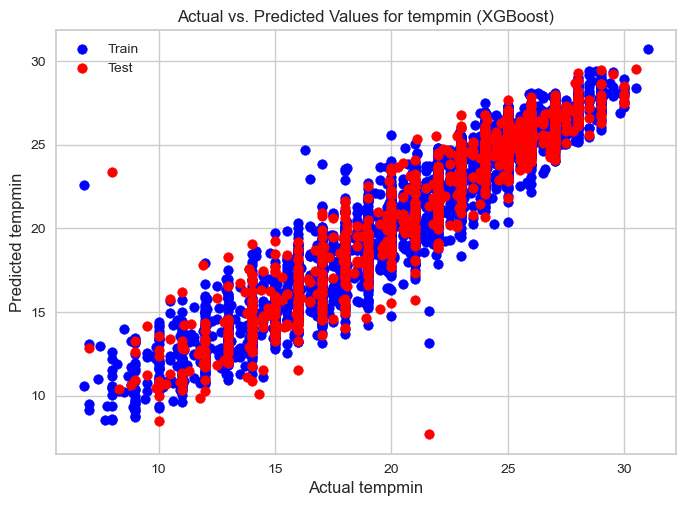

In [ ]:

plt.scatter(y_train_tempmin, y_pred_train_tempmin_xgb, color='blue', label='Train')

# Scatter plot for test set
plt.scatter(y_test_tempmin, y_pred_test_tempmin_xgb, color='red', label='Test')

# Adding labels and title
plt.title('Actual vs. Predicted Values for tempmin (XGBoost)')
plt.xlabel('Actual tempmin')
plt.ylabel('Predicted tempmin')
plt.legend()
plt.grid(True)
plt.show()


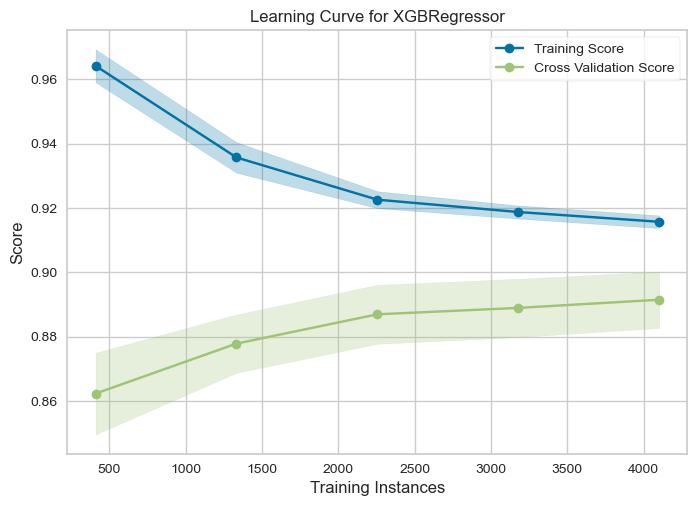

<Axes: title={'center': 'Learning Curve for XGBRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
from yellowbrick.model_selection import LearningCurve

# Create the learning curve visualizer
visualizer = LearningCurve(
    best_model, scoring='r2', train_size=np.linspace(0.1, 1.0, 10),
    n_jobs=-1, random_state=42
)

# Fit the data to the visualizer
visualizer.fit(X_tempmin, y_tempmin)

# Finalize and show the plot
visualizer.show()


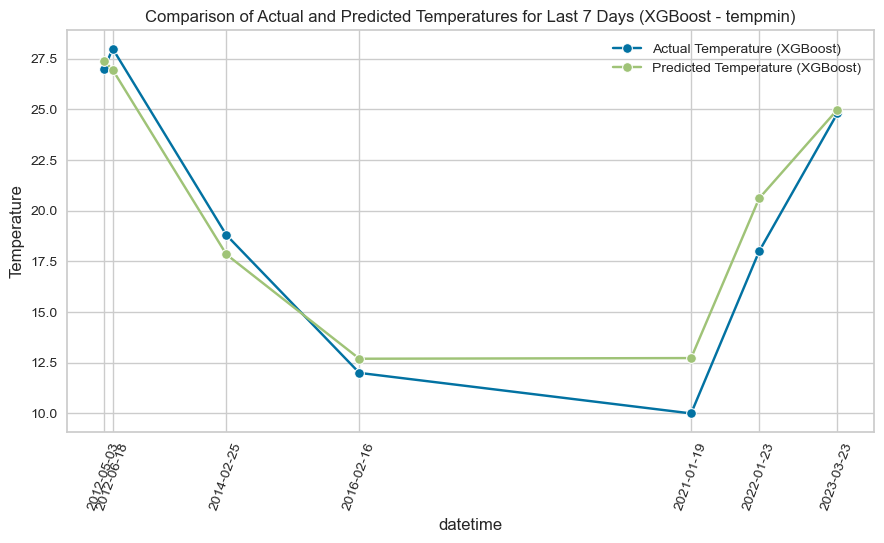

In [ ]:
# Last 7 days
last_7_days_xgb_tempmin = results_xgb_tempmin.tail(7)

plt.figure(figsize=(9, 5))
sns.lineplot(data=last_7_days_xgb_tempmin, x=last_7_days_xgb_tempmin.index, y='Actual', label='Actual Temperature (XGBoost)', marker='o')
sns.lineplot(data=last_7_days_xgb_tempmin, x=last_7_days_xgb_tempmin.index, y='Predicted', label='Predicted Temperature (XGBoost)', marker='o')
plt.ylabel('Temperature')
plt.title('Comparison of Actual and Predicted Temperatures for Last 7 Days (XGBoost - tempmin)')
plt.tight_layout()
plt.legend()

# Label the x-axis with date
plt.xticks(last_7_days_xgb_tempmin.index, [date.strftime('%Y-%m-%d') for date in last_7_days_xgb_tempmin.index], rotation=70)

plt.show()


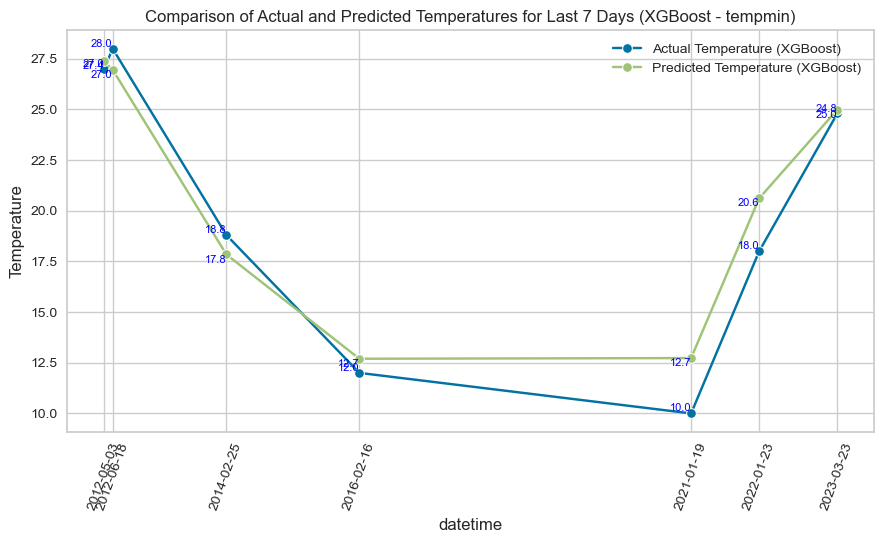

In [ ]:
# Plotting the last 7 days with numbers
plt.figure(figsize=(9, 5))
sns.lineplot(data=last_7_days_xgb_tempmin, x=last_7_days_xgb_tempmin.index, y='Actual', label='Actual Temperature (XGBoost)', marker='o')
sns.lineplot(data=last_7_days_xgb_tempmin, x=last_7_days_xgb_tempmin.index, y='Predicted', label='Predicted Temperature (XGBoost)', marker='o')

# Add numbers on each point
for i, (actual, predicted) in enumerate(zip(last_7_days_xgb_tempmin['Actual'], last_7_days_xgb_tempmin['Predicted'])):
    plt.text(last_7_days_xgb_tempmin.index[i], actual, f"{actual:.1f}", ha='right', va='bottom', fontsize=8, color='blue')
    plt.text(last_7_days_xgb_tempmin.index[i], predicted, f"{predicted:.1f}", ha='right', va='top', fontsize=8, color='blue')

plt.ylabel('Temperature')
plt.title('Comparison of Actual and Predicted Temperatures for Last 7 Days (XGBoost - tempmin)')
plt.tight_layout()
plt.legend()

# Label the x-axis with date
plt.xticks(last_7_days_xgb_tempmin.index, [date.strftime('%Y-%m-%d') for date in last_7_days_xgb_tempmin.index], rotation=70)

plt.show()


### Compare reviews between 3 models

### 1. Tempmax

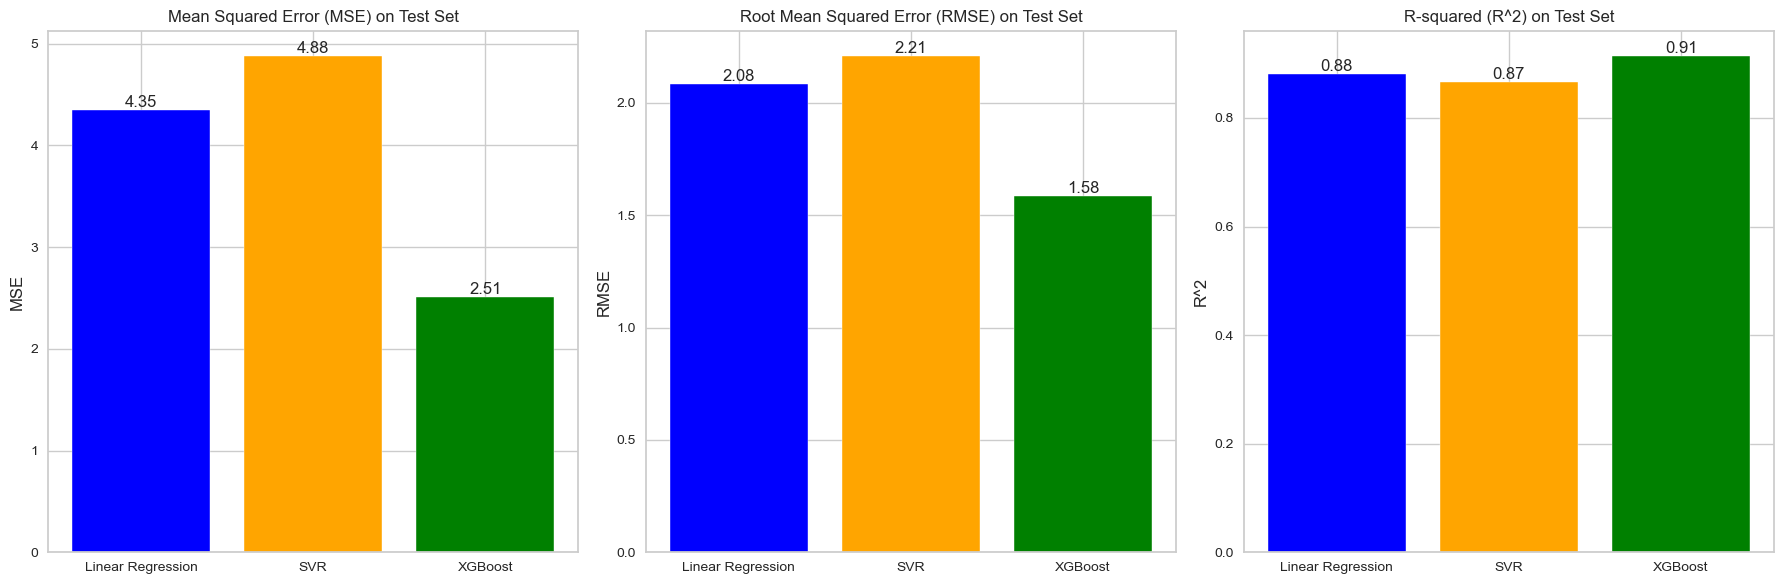

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Linear Regression', 'SVR', 'XGBoost']
mse_values = [mse_test_tempmax, mse_test_tempmax_svr, mse_test]
rmse_values = [rmse_test_tempmax, rmse_test_tempmax_svr, rmse_test]
r2_values = [r2_test_tempmax, r2_test_tempmax_svr, r2_test]

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# MSE
axes[0].bar(models, mse_values, color=['blue', 'orange', 'green'])
axes[0].set_title('Mean Squared Error (MSE) on Test Set')
axes[0].set_ylabel('MSE')
for i, mse in enumerate(mse_values):
    axes[0].text(i, mse, f'{mse:.2f}', ha='center', va='bottom')

# RMSE
axes[1].bar(models, rmse_values, color=['blue', 'orange', 'green'])
axes[1].set_title('Root Mean Squared Error (RMSE) on Test Set')
axes[1].set_ylabel('RMSE')
for i, rmse in enumerate(rmse_values):
    axes[1].text(i, rmse, f'{rmse:.2f}', ha='center', va='bottom')

# R^2
axes[2].bar(models, r2_values, color=['blue', 'orange', 'green'])
axes[2].set_title('R-squared (R^2) on Test Set')
axes[2].set_ylabel('R^2')
for i, r2 in enumerate(r2_values):
    axes[2].text(i, r2, f'{r2:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


### 2. Tempmin

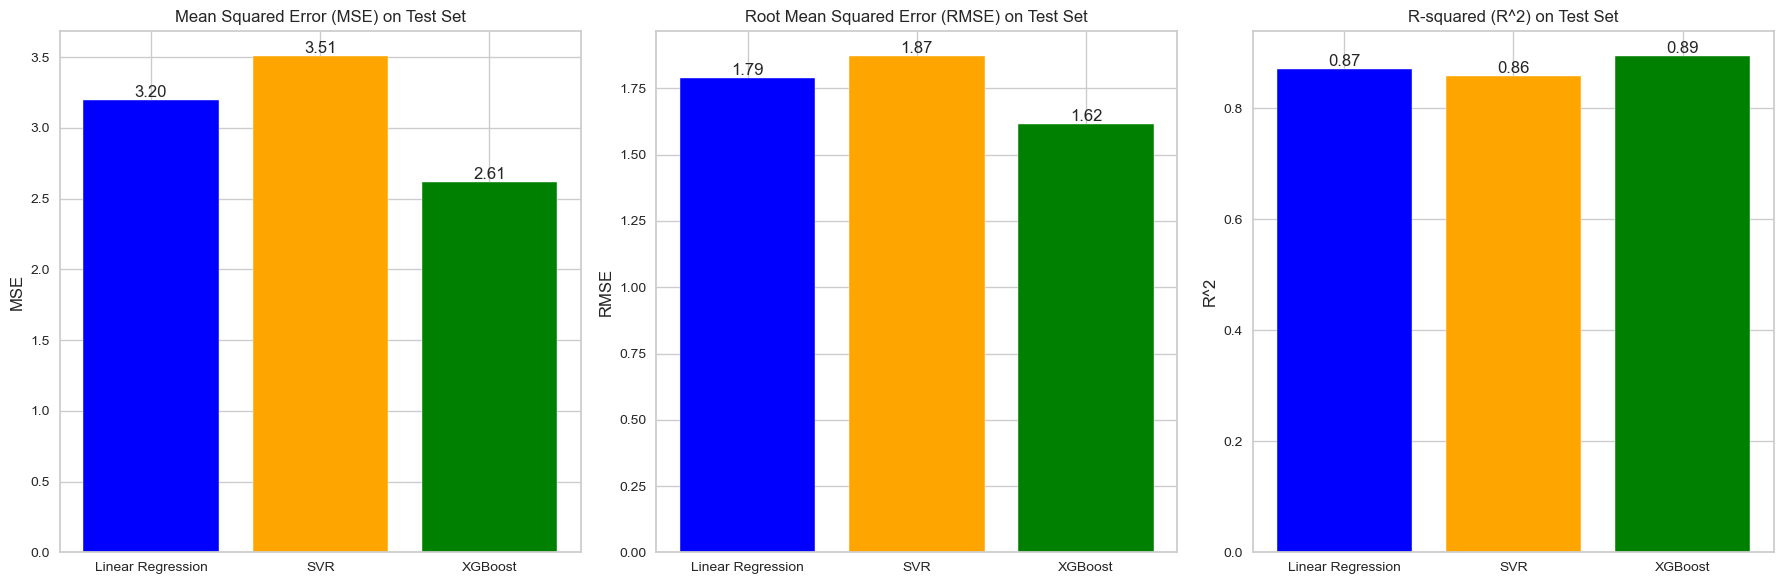

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Linear Regression', 'SVR', 'XGBoost']
mse_values = [mse_test_tempmin, mse_test_tempmin_svr, mse_test_tempmin_xgb]
rmse_values = [rmse_test_tempmin, rmse_test_tempmin_svr, rmse_test_tempmin_xgb]
r2_values = [r2_test_tempmin, r2_test_tempmin_svr, r2_test_tempmin_xgb]

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# MSE
axes[0].bar(models, mse_values, color=['blue', 'orange', 'green'])
axes[0].set_title('Mean Squared Error (MSE) on Test Set')
axes[0].set_ylabel('MSE')
for i, mse in enumerate(mse_values):
    axes[0].text(i, mse, f'{mse:.2f}', ha='center', va='bottom')

# RMSE
axes[1].bar(models, rmse_values, color=['blue', 'orange', 'green'])
axes[1].set_title('Root Mean Squared Error (RMSE) on Test Set')
axes[1].set_ylabel('RMSE')
for i, rmse in enumerate(rmse_values):
    axes[1].text(i, rmse, f'{rmse:.2f}', ha='center', va='bottom')

# R^2
axes[2].bar(models, r2_values, color=['blue', 'orange', 'green'])
axes[2].set_title('R-squared (R^2) on Test Set')
axes[2].set_ylabel('R^2')
for i, r2 in enumerate(r2_values):
    axes[2].text(i, r2, f'{r2:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
